# Estudo do Mercado Financeiro (Bancos) - Este notebook utiliza a biblioteca yfinance e outras para analista algumas ações da bolsa de valores

### Site:       https://filipedeabreu.com

### Autor:      Filipe de Abreu

### Manutenção:  Filipe de Abreu

<hr>

# Testado em
### OS: Windows 11                                      
### Versão do python: 3.12.7    

## OBS: Se tratando de dados da bolsa de valores, os valores extraidos podem variar dependendo da data em que forem consultados

## Etapa de Datawrangling, ou seja, preparação da base de dados para extração de informação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:
#Função que retorna informações de um papel com base no input de um usuário
def cria_dataframe(acao, periodo):
    acao_santander =  yf.Ticker(acao)
    data = acao_santander.history(period=periodo)
    return data

### Consultando a ação do <font color='red'> Santander </font> ('SANB11.SA') no período de 1 ano ('1y')

In [3]:
df_santander = cria_dataframe('SANB11.SA','1y') #Selecionado a ação do santander, no periodo de 1 ano
df_santander.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-11-08 00:00:00-03:00,27.035815,27.593547,26.969644,27.574640,1854200,0.0,0.0
2023-11-09 00:00:00-03:00,27.792061,27.933856,27.432844,27.612452,1610100,0.0,0.0
2023-11-10 00:00:00-03:00,27.905499,28.434871,27.489562,28.236357,2451800,0.0,0.0
2023-11-13 00:00:00-03:00,28.151279,28.425417,27.924405,28.425417,1253600,0.0,0.0
2023-11-14 00:00:00-03:00,28.586120,29.115492,28.122919,29.115492,2109900,0.0,0.0
2023-11-16 00:00:00-03:00,29.247836,30.287675,28.916977,30.230955,2510400,0.0,0.0
2023-11-17 00:00:00-03:00,30.108066,30.193144,29.228929,29.314007,3210000,0.0,0.0
2023-11-20 00:00:00-03:00,29.219476,29.276194,28.822446,29.276194,2157700,0.0,0.0
2023-11-21 00:00:00-03:00,29.172211,29.455803,28.973695,29.020962,1872100,0.0,0.0


In [4]:
df_santander[['Dividends', 'Stock Splits']].head(30)

,Dividends,Stock Splits
Date,,
2023-11-08 00:00:00-03:00,0.0,0.0
2023-11-09 00:00:00-03:00,0.0,0.0
2023-11-10 00:00:00-03:00,0.0,0.0
2023-11-13 00:00:00-03:00,0.0,0.0
2023-11-14 00:00:00-03:00,0.0,0.0
2023-11-16 00:00:00-03:00,0.0,0.0
2023-11-17 00:00:00-03:00,0.0,0.0
2023-11-20 00:00:00-03:00,0.0,0.0
2023-11-21 00:00:00-03:00,0.0,0.0


In [6]:
df_santander['Stock Splits'][ df_santander['Stock Splits'] != 0]

Series([], Name: Stock Splits, dtype: float64)

In [5]:
df_santander['Dividends'][ df_santander['Dividends'] != 0]

Date
2024-01-22 00:00:00-03:00    0.402856
2024-04-22 00:00:00-03:00    0.402399
2024-07-22 00:00:00-03:00    0.402500
2024-10-18 00:00:00-03:00    0.402476
Name: Dividends, dtype: float64

### Primeiras impressoes

O dataframe apresenta váriaveis quantitativas continuas e não há variaveis categóricas, o index poderia talvez ser reduzido, deixando apenas a data e tirando a hora, já que não pretendo analisar de forma precisa o horário de abertura ou fechamento das ações. Se trata de dados populacionas, portanto, para qualquer analise estatisca, deve se ter em mente que sao dados populacionas, e nao de uma amsotra.

As variaveis 'Dividends' e 'Stock Splits' já de ínicio, apresentaram muitos valores iguais a 0, analisando essa variaveis separadamente, observei que apenas a variavel 'Dividends' possui valores diferentes de zero, porém em apenas 4 observações, portanto, irei remover essas variáveis  do dataframe

In [7]:
df_santander.drop(['Dividends', 'Stock Splits'], axis = 1, inplace = True)

### Extraindo algumas informações básicas do dataset

In [8]:
df_santander.info() #tipos de dados
#Não há campos NaN para serem tratados

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2023-11-08 00:00:00-03:00 to 2024-11-08 00:00:00-03:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    254 non-null    float64
 1   High    254 non-null    float64
 2   Low     254 non-null    float64
 3   Close   254 non-null    float64
 4   Volume  254 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.9 KB


In [9]:
print(f'Numero de observações: {df_santander.shape[0]} \nNúmero de variáveis: {df_santander.shape[1]}')  #formato

Numero de observações: 254 
Número de variáveis: 5


## Etapa de estatistica descritiva

In [10]:
df_santander_descritivo = df_santander.describe()

#Renomeando o index
df_santander_descritivo.index = ['Contagem','Média','Desvio Padrão', 'Mínimo', '1° Quartil', '2° Quartil', '3° Quartil', 'Máximo']

#Defining o numero de casas decimais para 3
pd.set_option('float.format','{:.3f}'.format)

#Printando o novo data set
df_santander_descritivo

,Open,High,Low,Close,Volume
Contagem,254.000,254.000,254.000,254.000,254.000
Média,28.145,28.416,27.878,28.144,2664909.843
Desvio Padrão,1.322,1.337,1.322,1.331,4525544.892
Mínimo,25.475,25.840,25.370,25.418,0.000
1° Quartil,27.116,27.404,26.904,27.096,1464225.000
2° Quartil,27.927,28.309,27.726,27.981,1973400.000
3° Quartil,28.964,29.271,28.708,28.926,2938700.000
Máximo,31.199,31.534,31.071,31.327,71189700.000


In [11]:
#Utilizando medidadas de dispersao, coeficiente de variancia


#Calculando coeficiente de variação para as variaveis Open, High, Low e Close

coeficientes_de_variacao = []
for i in range (0,5):
    coeficientes_de_variacao.append((df_santander_descritivo.iloc[2, i] / df_santander_descritivo.iloc[1, i]) * 100)

#Adcionando a porcentagem, tendo em vista que o coeficiente da variação é obsavardo em porcentagem
coeficientes_com_porcentagem = [f"{coeficientes_de_variacao:.3f}%" for coeficientes_de_variacao in coeficientes_de_variacao]

#CV = Coeficiente de variação
pd.Series(coeficientes_com_porcentagem, index=['CV_Open:','CV_High:','CV_Low:','CV_Close:', 'CV_Volume:'])

CV_Open:        4.697%
CV_High:        4.707%
CV_Low:         4.741%
CV_Close:       4.728%
CV_Volume:    169.820%
dtype: object

In [12]:
variancias = []

for i in range(0,5):
    variancias.append(df_santander.iloc[:, i].var())

variancias

[1.7472339945674078,
 1.7887719321420887,
 1.7471641267145916,
 1.770766693473445,
 20480556570377.035]

In [13]:
#Adcionando os coeficientes de variação ao datagFrame
df_santander_descritivo.loc['Coeficiente de Variação'] = coeficientes_com_porcentagem

#Adcionando as variancias o ao datagFrame
df_santander_descritivo.loc['Variancia'] = variancias

df_santander_descritivo

,Open,High,Low,Close,Volume
Contagem,254.000,254.000,254.000,254.000,254.000
Média,28.145,28.416,27.878,28.144,2664909.843
Desvio Padrão,1.322,1.337,1.322,1.331,4525544.892
Mínimo,25.475,25.840,25.370,25.418,0.000
1° Quartil,27.116,27.404,26.904,27.096,1464225.000
2° Quartil,27.927,28.309,27.726,27.981,1973400.000
3° Quartil,28.964,29.271,28.708,28.926,2938700.000
Máximo,31.199,31.534,31.071,31.327,71189700.000
Coeficiente de Variação,4.697%,4.707%,4.741%,4.728%,169.820%
Variancia,1.747,1.789,1.747,1.771,20480556570377.035


### O que se pode observar das estatiscas acima?

Em média, o valor de abertura da ação não é muito diferente do valor de fechamento. Tirando a variavel "Volume", o coeficiente de variação foi menor que 10% para todas as variaveis que os dados são significativamente homogêneos, ou seja, não são muitos dispersos

### Algumas informações gráficas simples

In [14]:
df_santander['Close'].max()

31.327402114868164

Text(2024-07-29 00:00:00-03:00, 28.244249187679742, 'Média')

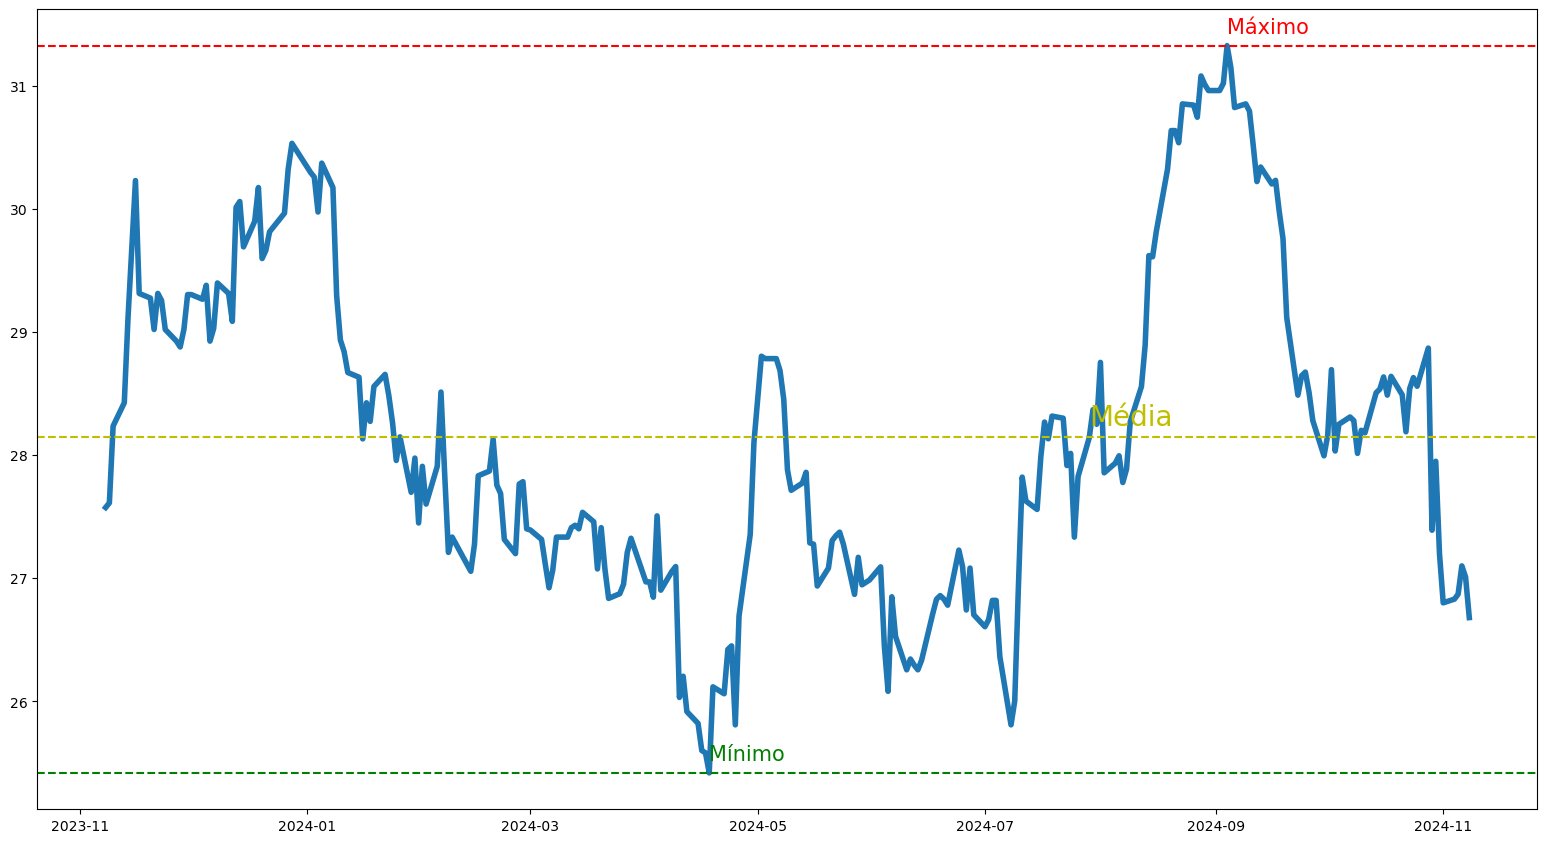

In [15]:
#Analisando apenas a variable "Close"

#Plotando um graáfico de linha
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(df_santander.index, df_santander['Close'], linewidth=4)

#Traçando uma linha rente ao valor maximo ja atingido lo papel
ax.axhline(df_santander['Close'].max(), c= 'r', ls = '--')
ax.annotate("Máximo", 
            (df_santander['Close'].idxmax(), df_santander['Close'].max() + 0.1),
            fontsize=15,
            c= 'r'
           )

#Traçando uma linha rente ao valor mínimo ja atingido lo papel
ax.axhline(df_santander['Close'].min(), c='g', ls = '--')
ax.annotate("Mínimo", 
            (df_santander['Close'].idxmin(), df_santander['Close'].min() + 0.1),
            fontsize=15,
            c='g'
           )

#Traçando uma linha rente a média ja atingido lo papel
ax.axhline(df_santander['Close'].mean(), c='y', ls = '--')
ax.annotate("Média", 
            ((df_santander['Close'] - df_santander['Close'].mean()).abs().idxmin(), df_santander['Close'].mean() + 0.1),
            fontsize=20,
            c='y'
           )


<Axes: xlabel='Close', ylabel='Count'>

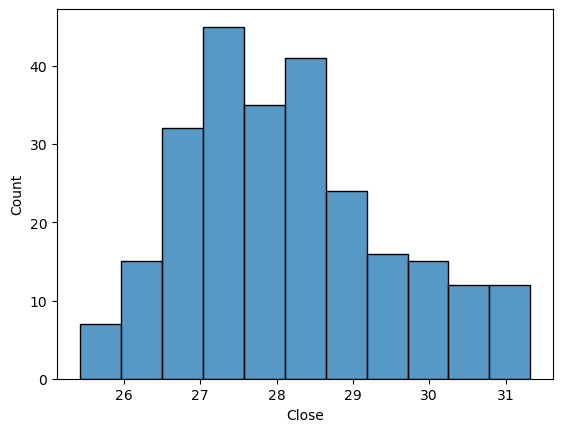

In [16]:
#Analisando a distribuição
sns.histplot(df_santander['Close'])

### Tratamento do dataframe santander